将原始文本转化为词袋

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
vectorizer = CountVectorizer(min_df=1)

In [3]:
# vectorizer.build_analyzer()

In [4]:
content = ['how to format my hard disk.','hard disk format a problems.']

In [5]:
X = vectorizer.fit_transform(content)

In [6]:
vectorizer

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [7]:
X.toarray()

array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]], dtype=int64)

In [8]:
vectorizer.get_feature_names()

[u'disk', u'format', u'hard', u'how', u'my', u'problems', u'to']

In [9]:
path = r'C:\python\BuildingMachineLearningSystemsWithPython-master\ch03\data\toy'

In [10]:
import os

In [11]:
#获取文件夹下的所有文件信息
path = r'C:\python\BuildingMachineLearningSystemsWithPython-master\ch03\data\toy'
posts = [open(os.path.join(path,i)).read() for i in os.listdir(path)]

In [12]:
posts

['This is a toy post about machine learning. Actually, it contains not much interesting stuff.',
 'Imaging databases provide storage capabilities.',
 'Most imaging databases save images permanently.\n',
 'Imaging databases store data.',
 'Imaging databases store data. Imaging databases store data. Imaging databases store data.']

In [13]:
vectorizer = CountVectorizer(min_df=1)

In [14]:
X_train = vectorizer.fit_transform(posts)

In [15]:
X_train.toarray()

array([[1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 1, 1],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0],
       [0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
        0, 0, 0]], dtype=int64)

In [16]:
print vectorizer.get_feature_names()

[u'about', u'actually', u'capabilities', u'contains', u'data', u'databases', u'images', u'imaging', u'interesting', u'is', u'it', u'learning', u'machine', u'most', u'much', u'not', u'permanently', u'post', u'provide', u'save', u'storage', u'store', u'stuff', u'this', u'toy']


In [17]:
num_samples, num_features = X_train.shape
print num_samples,num_features

5 25


In [18]:
#增加一个新帖子
new_post = 'imaging databases'
new_post_vec = vectorizer.transform([new_post])

注意  在进行transform时候一定要加括号，因为不加括号，程序会人为是字符串中的每个字符。如果加括号就会被人为是一个帖子进行转化。

In [19]:
print new_post_vec

  (0, 5)	1
  (0, 7)	1


In [20]:
print new_post_vec.toarray()

[[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [22]:
#计算两个向量之间的欧氏距离
import scipy as sp
def dist_raw(v1,v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

norm()函数用于计算欧几里得范数

In [23]:
result = [dist_raw(i,new_post_vec) for i in X_train]
print new_post
count = 0
for i,v in zip(posts,result):
    print count,i,"the simility to new post is:","%.2f" % v
    count+=1

imaging databases
0 This is a toy post about machine learning. Actually, it contains not much interesting stuff. the simility to new post is: 4.00
1 Imaging databases provide storage capabilities. the simility to new post is: 1.73
2 Most imaging databases save images permanently.
the simility to new post is: 2.00
3 Imaging databases store data. the simility to new post is: 1.41
4 Imaging databases store data. Imaging databases store data. Imaging databases store data. the simility to new post is: 5.10


In [24]:
#我们看到，帖子1和新帖子是非常相似的，但不是最相似，因为他比帖子3多了1个未出现在新帖子中的词语。然后，帖子三和帖子4内容一样，但重复了三次。
print X_train[4].toarray()
print X_train[3].toarray()

[[0 0 0 0 3 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]]
[[0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]


很明显，如果只是统计词频的化太过于简单了，没有进行归一化的化虽然最后一个帖子是对第三个帖子进行的三次重复，但是计算相似性却差别非常大。所以有必要对帖子进行一次归一化，修改函数，不要再原始函数上进行，而是在归一化后的向量上进行，把各个维度上的向量都统一到单位向量上进行度量

In [25]:
def dist_norm(v1,v2):
    v1_normalized = v1/sp.linalg.norm(v1.toarray())
    v2_normalized = v2/sp.linalg.norm(v2.toarray())
    delta = v1_normalized - v2_normalized
    return sp.linalg.norm(delta.toarray())

In [26]:
result = [dist_norm(i,new_post_vec) for i in X_train]
print new_post
count = 0
for i,v in zip(posts,result):
    print count,i,"the simility to new post is:","%.2f" % v
    count+=1

imaging databases
0 This is a toy post about machine learning. Actually, it contains not much interesting stuff. the simility to new post is: 1.41
1 Imaging databases provide storage capabilities. the simility to new post is: 0.86
2 Most imaging databases save images permanently.
the simility to new post is: 0.92
3 Imaging databases store data. the simility to new post is: 0.77
4 Imaging databases store data. Imaging databases store data. Imaging databases store data. the simility to new post is: 0.77


对于帖子2，不包含在新帖子中的词语有most safe images permanently 事实上，他们在帖子中的重要性并不相同，想most这样的词语经常出现在各种不同文本中，这种词叫做停用词。他们并未承载很多信息量，因此不该赋予images这样不京城出现在各个文本中的词语一样的权重。最佳的选择应该是删除这样的高频词语

In [27]:
vectorizer = CountVectorizer(min_df=1)

In [28]:
words= [u'我，今天，非常的，开心',u'你，今天， 同样的 很 开心 你搜房搜房#对哦，你好 武']

In [29]:
print u'\u6b66'

武


In [30]:
train_x = vectorizer.fit_transform(words)

In [31]:
for i in vectorizer.get_feature_names():
    print i

今天
你好
你搜房搜房
同样的
对哦
开心
非常的


In [32]:
new_post_vec = vectorizer.transform([u'妈饿 就是 老子 开心'])

In [33]:
new_post_vec.toarray()

array([[0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [34]:
print vectorizer.get_feature_names()[2]

你搜房搜房


In [35]:
[dist_raw(i,new_post_vec) for i in train_x]

[1.4142135623730951, 2.2360679774997898]

经过实践证明，vectorizer分词既可以识别出空格，对于汉字一个字的会进行过滤，也可是识别出逗号。真牛逼！

这里接着停用词部分继续

In [36]:
vectorizer = CountVectorizer(min_df=1,stop_words='english')

In [37]:
list(vectorizer.get_stop_words())[:20]

['all',
 'six',
 'less',
 'being',
 'indeed',
 'over',
 'move',
 'anyway',
 'four',
 'not',
 'own',
 'through',
 'yourselves',
 'fify',
 'where',
 'mill',
 'only',
 'find',
 'before',
 'one']

In [38]:
vectorizer = CountVectorizer(min_df=1,stop_words='english')

In [39]:
X_train = vectorizer.fit_transform(posts)

In [40]:
len(vectorizer.get_feature_names())
#加入停用词后，新词语列表就减少了7个词语

18

In [41]:
new_post = 'imaging databases'
new_post_vec = vectorizer.transform([new_post])

In [42]:
def dist_norm(v1,v2):
    v1_normalized = v1/sp.linalg.norm(v1.toarray())
    v2_normalized = v2/sp.linalg.norm(v2.toarray())
    delta = v1_normalized - v2_normalized
    return sp.linalg.norm(delta.toarray())

In [43]:
result = [dist_norm(i,new_post_vec) for i in X_train]
print new_post
count = 0
for i,v in zip(posts,result):
    print count,i,"the simility to new post is:","%.2f" % v
    count+=1

imaging databases
0 This is a toy post about machine learning. Actually, it contains not much interesting stuff. the simility to new post is: 1.41
1 Imaging databases provide storage capabilities. the simility to new post is: 0.86
2 Most imaging databases save images permanently.
the simility to new post is: 0.86
3 Imaging databases store data. the simility to new post is: 0.77
4 Imaging databases store data. Imaging databases store data. Imaging databases store data. the simility to new post is: 0.77


第二篇和第三篇帖子看起来旗鼓相当，总和来说，效果并没有明显改变。但如果帖子很长 效果还是非常明显的。通过删除词语的方式，留下的词语的权重就都是一样的了

In [44]:
print new_post_vec.toarray()
print X_train.toarray()[[2,3]]

[[0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0]]


语意分析，词干处理。例如对于计算机和电脑  应该归于一类做词频统计，这样更合理

In [69]:
import nltk.stem

In [71]:
s = nltk.stem.SnowballStemmer('english')

In [72]:
print s.stem('graphics')
print s.stem('imaging')
print s.stem('image')
print s.stem('imagine')

graphic
imag
imag
imagin


In [122]:
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))
vectorizer = StemmedCountVectorizer(min_df=1,stop_words='english')

In [123]:
print vectorizer.build_analyzer()(posts[0])   #build_analyzer的作用是用于分词，并且去停用词
posts[0]

<generator object <genexpr> at 0x000000000911F090>


'This is a toy post about machine learning. Actually, it contains not much interesting stuff.'

In [124]:
X = vectorizer.fit_transform(posts)

In [125]:
print X.toarray()

[[1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1]
 [0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 1 2 0 0 0 1 0 0 1 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 3 3 3 0 0 0 0 0 0 0 0 3 0 0]]


In [126]:
print X_train.toarray()

[[1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1]
 [0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 3 3 0 3 0 0 0 0 0 0 0 0 3 0 0]]


In [127]:
vectorizer.get_feature_names()

[u'actual',
 u'capabl',
 u'contain',
 u'data',
 u'databas',
 u'imag',
 u'interest',
 u'learn',
 u'machin',
 u'perman',
 u'post',
 u'provid',
 u'save',
 u'storag',
 u'store',
 u'stuff',
 u'toy']

In [129]:
new_post = 'imaging databases'
new_post_vec = vectorizer.transform([new_post])

In [130]:
def dist_norm(v1,v2):
    v1_normalized = v1/sp.linalg.norm(v1.toarray())
    v2_normalized = v2/sp.linalg.norm(v2.toarray())
    delta = v1_normalized - v2_normalized
    return sp.linalg.norm(delta.toarray())

In [132]:
result = [dist_norm(i,new_post_vec) for i in X]
print new_post
count = 0
for i,v in zip(posts,result):
    print count,i,"the simility to new post is:","%.2f" % v
    count+=1

imaging databases
0 This is a toy post about machine learning. Actually, it contains not much interesting stuff. the simility to new post is: 1.41
1 Imaging databases provide storage capabilities. the simility to new post is: 0.86
2 Most imaging databases save images permanently.
the simility to new post is: 0.63
3 Imaging databases store data. the simility to new post is: 0.77
4 Imaging databases store data. Imaging databases store data. Imaging databases store data. the simility to new post is: 0.77


牛逼  通过词干的处理，我们找到了最终最为相似的帖子

Tf-Idf   词频-反文档频率
- 词频是指在当前文档中该词出现的次数 比 所有文档中出现该词的次数
- 反文档频率是指 所有文档数量 比 所有文档中出现该词文档的次数
tf-idf的目的是赋予语料库中每个词语不同的权重，对于容易区分的词语赋予权重更大，总出现的词语赋予较低的权重。这样，如果索引词语出现了容易区分的词语，那么和有该词语的帖子就应该有更高的相似度

In [116]:
import scipy as sp
import math
def tfidf(term,doc,docset):
    tf = float(doc.count(term))/sum(doc.count(term) for doc in docset)  #利用迭代器的方式  真牛鼻！
    idf = math.log(float(len(docset))/ (len([doc for doc in docset if term in doc])))
    print tf,idf
    return tf*idf

In [115]:
a,abb,abc = ['中国'],['中国','美国','美国'],['中国','美国','古巴']
D = [a,abb,abc]
D

[['\xe4\xb8\xad\xe5\x9b\xbd'],
 ['\xe4\xb8\xad\xe5\x9b\xbd',
  '\xe7\xbe\x8e\xe5\x9b\xbd',
  '\xe7\xbe\x8e\xe5\x9b\xbd'],
 ['\xe4\xb8\xad\xe5\x9b\xbd',
  '\xe7\xbe\x8e\xe5\x9b\xbd',
  '\xe5\x8f\xa4\xe5\xb7\xb4']]

In [120]:
print tfidf('古巴',abc,D)
#這个例子很恰当啊

1.0 1.09861228867
1.09861228867


In [121]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [166]:
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_aualyzer(self):
        analyzer = supper(TfidfVectorizer,self).build_aualyzer()  #前半句是和自己实例化
        return lambda doc:(english_stemmer.stem(w) for w in analyzer(doc))

In [167]:
vectorizer = StemmedTfidfVectorizer(min_df=1,stop_words='english')

In [169]:
X_train = vectorizer.fit_transform(posts)

In [170]:
new_post = 'imaging databases'
new_post_vec = vectorizer.transform([new_post])

In [180]:
print X_train.toarray()
print '---'*36
print new_post_vec.toarray()

[[ 0.35355339  0.          0.35355339  0.          0.          0.          0.
   0.35355339  0.35355339  0.35355339  0.          0.35355339  0.          0.
   0.          0.          0.35355339  0.35355339]
 [ 0.          0.52451722  0.          0.          0.29550385  0.
   0.29550385  0.          0.          0.          0.          0.
   0.52451722  0.          0.52451722  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.29550385  0.52451722
   0.29550385  0.          0.          0.          0.52451722  0.          0.
   0.52451722  0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.57974759  0.40483667  0.
   0.40483667  0.          0.          0.          0.          0.          0.
   0.          0.          0.57974759  0.          0.        ]
 [ 0.          0.          0.          0.57974759  0.40483667  0.
   0.40483667  0.          0.          0.          0.          0.          0.
   0.          0.   

In [171]:
def dist_norm(v1,v2):
    v1_normalized = v1/sp.linalg.norm(v1.toarray())
    v2_normalized = v2/sp.linalg.norm(v2.toarray())
    delta = v1_normalized - v2_normalized
    return sp.linalg.norm(delta.toarray())

In [172]:
result = [dist_norm(i,new_post_vec) for i in X_train]
print new_post
count = 0
for i,v in zip(posts,result):
    print count,i,"the simility to new post is:","%.2f" % v
    count+=1

imaging databases
0 This is a toy post about machine learning. Actually, it contains not much interesting stuff. the simility to new post is: 1.41
1 Imaging databases provide storage capabilities. the simility to new post is: 1.08
2 Most imaging databases save images permanently.
the simility to new post is: 1.08
3 Imaging databases store data. the simility to new post is: 0.92
4 Imaging databases store data. Imaging databases store data. Imaging databases store data. the simility to new post is: 0.92


如果不进行词干处理，直接通过tf-idf进行运算，结果会怎样呢？

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [187]:
vectorizer = TfidfVectorizer(min_df=1,stop_words='english')
X_train = vectorizer.fit_transform(posts)

In [188]:
new_post = 'imaging databases'
new_post_vec = vectorizer.transform([new_post])

In [189]:
def dist_norm(v1,v2):
    v1_normalized = v1/sp.linalg.norm(v1.toarray())
    v2_normalized = v2/sp.linalg.norm(v2.toarray())
    delta = v1_normalized - v2_normalized
    return sp.linalg.norm(delta.toarray())

In [186]:
result = [dist_norm(i,new_post_vec) for i in X_train]
print new_post
count = 0
for i,v in zip(posts,result):
    print count,i,"the simility to new post is:","%.2f" % v
    count+=1

imaging databases
0 This is a toy post about machine learning. Actually, it contains not much interesting stuff. the simility to new post is: 1.41
1 Imaging databases provide storage capabilities. the simility to new post is: 1.08
2 Most imaging databases save images permanently.
the simility to new post is: 1.08
3 Imaging databases store data. the simility to new post is: 0.92
4 Imaging databases store data. Imaging databases store data. Imaging databases store data. the simility to new post is: 0.92


文本预处理，包含以下步骤：
1. 切分文本；
2. 扔掉出现频率过于频繁而又对检测相关帖子没有帮助的词语
3. 扔掉出现频率过于低，只有很小可能出现在未来帖子中的词语
4. 统计剩余词语
5. 考虑整个语料库集合，从词频统计中计算tf-idf值

词袋模型的缺点：
1. 它不涵盖词语之间的关联关系
2. 无法正确捕捉否定关系
3. 对于拼写错误的词语会处理失败

### 聚类

In [45]:
import os
import scipy as sp
from scipy.stats import norm
from matplotlib import pylab
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
%matplotlib inline

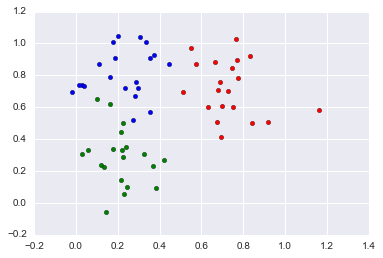

In [51]:
plt.scatter(xw1,yw1,c = 'g')
plt.scatter(xw2,yw2,c='r')
plt.scatter(xw3,yw3,c='b')

关于画图的几个练习

In [53]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


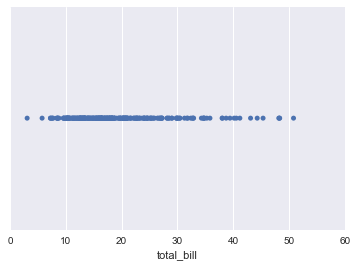

In [54]:
# sns.set(style="white", color_codes=True)
#单变量画图
sns.stripplot(tips['total_bill'])

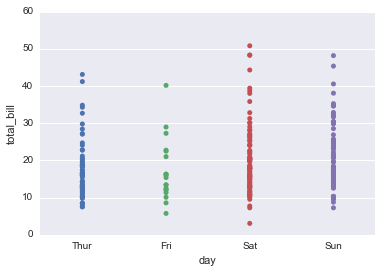

In [56]:
#分类变量和数值变量画图
sns.stripplot(x='day',y='total_bill',data=tips)

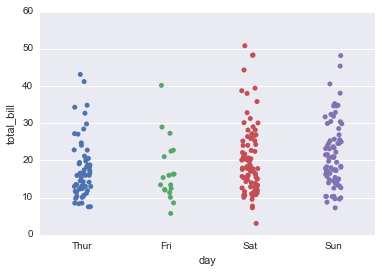

In [61]:
#上图增加抖动效果
ax = sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)

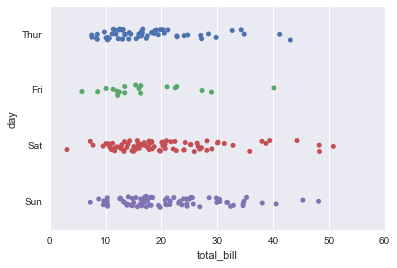

In [58]:
#数值和分类变量位置互换就可以转换为平行坐标图
sns.stripplot(y='day',x='total_bill',data=tips,jitter=True)

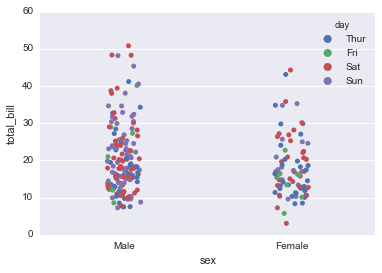

In [63]:
#颜色用hue表示
sns.stripplot(x="sex", y="total_bill", hue="day",data=tips, jitter=True)

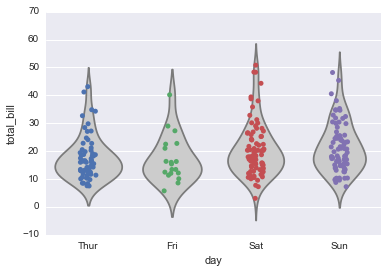

In [67]:
#合并两张图，看整体效果。这张图很重要。
ax = sns.violinplot(x="day", y="total_bill", data=tips,inner=None, color=".8")
ax = sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

In [287]:
import seaborn as sns
import numpy as np
from numpy.random import randn
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

In [288]:
sns.set_palette('deep', desat=.6)
sns.set_context(rc={'figure.figsize': (8, 5) } )
np.random.seed(1425)

(array([  2.,   5.,   4.,  10.,  12.,  16.,   7.,   7.,   6.,   6.]),
 array([-2.04713616, -1.64185099, -1.23656582, -0.83128065, -0.42599548,
        -0.02071031,  0.38457486,  0.78986003,  1.1951452 ,  1.60043037,
         2.00571554]),
 <a list of 10 Patch objects>)

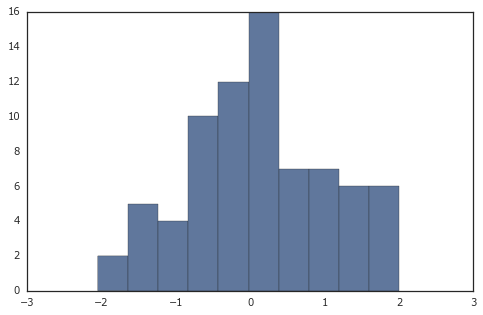

In [289]:
data = randn(75)
plt.hist(data)

(array([  3.,   6.,   8.,  10.,  14.,  15.,  15.,  11.,   7.,   7.,   2.,
          2.]),
 array([-2.19974846, -1.78742423, -1.3751    , -0.96277576, -0.55045153,
        -0.1381273 ,  0.27419693,  0.68652116,  1.09884539,  1.51116962,
         1.92349385,  2.33581809,  2.74814232]),
 <a list of 12 Patch objects>)

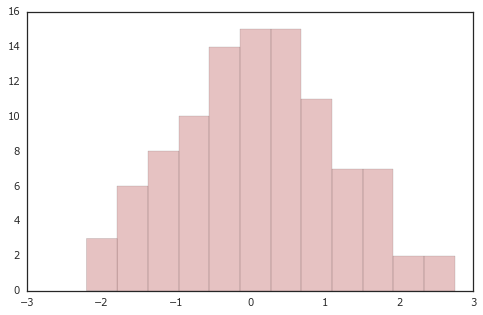

In [290]:
data = randn(100)
plt.hist(data, bins=12, color=sns.desaturate("indianred", .8), alpha=.4)


In [291]:
data1 = stats.poisson(2).rvs(100)
data2 = stats.poisson(5).rvs(500)

In [292]:
max_data = np.r_[data1, data2].max()

(array([ 0.012,  0.04 ,  0.074,  0.15 ,  0.164,  0.174,  0.15 ,  0.098,
         0.074,  0.038,  0.012,  0.008,  0.002,  0.004]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.]),
 <a list of 14 Patch objects>)

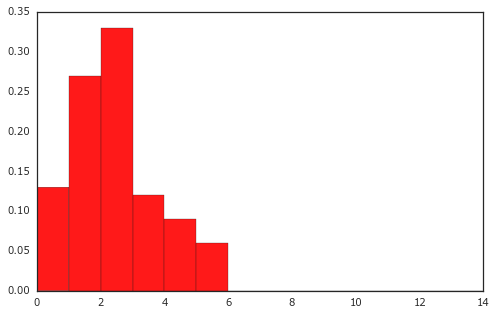

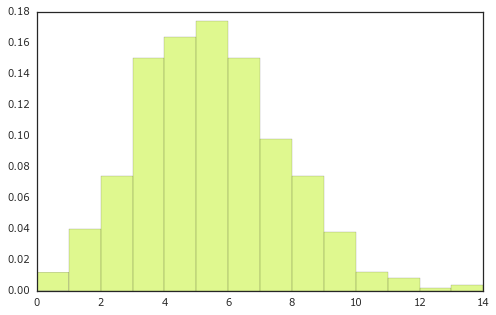

In [311]:
bins = np.linspace(0, max_data, max_data+1)
plt.hist(data1, bins, normed=True, color="#FF0000", alpha=.9)
plt.figure()
plt.hist(data2, bins, normed=True, color="#C1F320", alpha=.5)

In [308]:
bins = bins[:10]

(array([ 0.012,  0.04 ,  0.074,  0.15 ,  0.164,  0.174,  0.15 ,  0.098,
         0.074,  0.038,  0.012,  0.008,  0.002,  0.004]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.]),
 <a list of 14 Patch objects>)

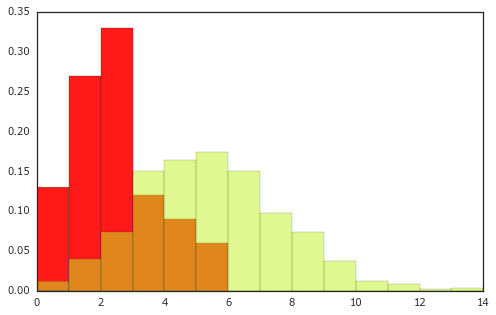

In [312]:
plt.hist(data1, bins, normed=True, color="#FF0000", alpha=.9)
plt.hist(data2, bins, normed=True, color="#C1F320", alpha=.5)

In [303]:
plt.hist?

In [313]:
x = stats.gamma(3).rvs(5000);

(array([  19.,   54.,   74.,  127.,  145.,  219.,  190.,  227.,  268.,
         236.,  274.,  224.,  254.,  246.,  222.,  208.,  214.,  171.,
         183.,  152.,  161.,  117.,  117.,   99.,   87.,   82.,   71.,
          64.,   68.,   60.,   43.,   40.,   34.,   27.,   28.,   31.,
          21.,   15.,   14.,   15.,   13.,   11.,   10.,    9.,    7.,
           8.,    6.,    4.,    3.,    2.,    5.,    1.,    2.,    2.,
           0.,    1.,    0.,    2.,    2.,    2.,    1.,    0.,    0.,
           1.,    2.,    1.,    0.,    0.,    2.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  0.10465498,   0.29346305,   0.48227112,   0.67107919,
          0.85988726,   1.04869533,   1.2375034 ,   1.42631148,
          1.61511955,   1.80392762,   1.99273569,   2.18154376,
          2.37035183,   2.5591599 ,   2.74796797,   2.93677604,
          3.12558412,   3.31439219,   3.50320026,   3.69200833,
          3.8808164 ,   4.06962447,   4.258432

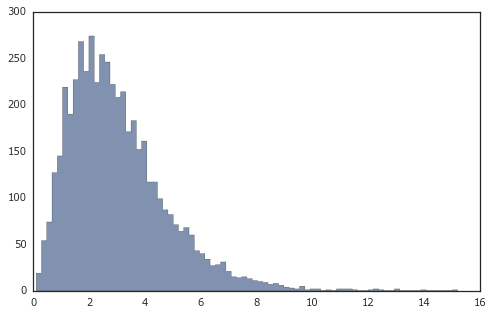

In [317]:
plt.hist(x, bins=80, histtype="stepfilled", alpha=.8)

画k-means决策边界

In [68]:
xw1 = norm(loc=0.3, scale=.15).rvs(20)
yw1 = norm(loc=0.3, scale=.15).rvs(20)  #均值0.3，方差0.15

xw2 = norm(loc=0.7, scale=.15).rvs(20)
yw2 = norm(loc=0.7, scale=.15).rvs(20)

xw3 = norm(loc=0.2, scale=.15).rvs(20)
yw3 = norm(loc=0.8, scale=.15).rvs(20)

x = sp.append(sp.append(xw1, xw2), xw3)
y = sp.append(sp.append(yw1, yw2), yw3)

In [72]:
def plot_clustering(x, y, title, mx=None, ymax=None, xmin=None, km=None):
    pylab.figure(num=None, figsize=(8, 6))
    if km:
        pylab.scatter(x, y, s=50, c=km.predict(list(zip(x, y))))
    else:
        pylab.scatter(x, y, s=50)

    pylab.title(title)
    pylab.xlabel("Occurrence word 1")
    pylab.ylabel("Occurrence word 2")

    pylab.autoscale(tight=True)
    pylab.ylim(ymin=0, ymax=1)
    pylab.xlim(xmin=0, xmax=1)
    pylab.grid(True, linestyle='-', color='0.75')

    return pylab

In [73]:
x = sp.append(sp.append(xw1, xw2), xw3)
y = sp.append(sp.append(yw1, yw2), yw3)

<module 'matplotlib.pylab' from 'C:\Anaconda2\lib\site-packages\matplotlib\pylab.pyc'>

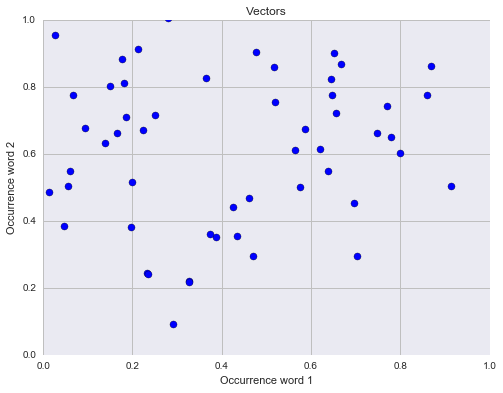

In [74]:
plot_clustering(x, y, "Vectors")

In [80]:
seed = 2
sp.random.seed(seed)  # to reproduce the data later on

num_clusters = 3

In [81]:
mx, my = sp.meshgrid(sp.arange(0, 1, 0.001), sp.arange(0, 1, 0.001))

In [82]:
km = KMeans(init='random', n_clusters=num_clusters, verbose=1,
            n_init=1, max_iter=1,
            random_state=seed)

In [83]:
km.fit(sp.array(list(zip(x, y))))

Initialization complete
Iteration  0, inertia 3.405


KMeans(copy_x=True, init='random', max_iter=1, n_clusters=3, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=2, tol=0.0001,
    verbose=1)

In [84]:
Z = km.predict(sp.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)


<module 'matplotlib.pylab' from 'C:\Anaconda2\lib\site-packages\matplotlib\pylab.pyc'>

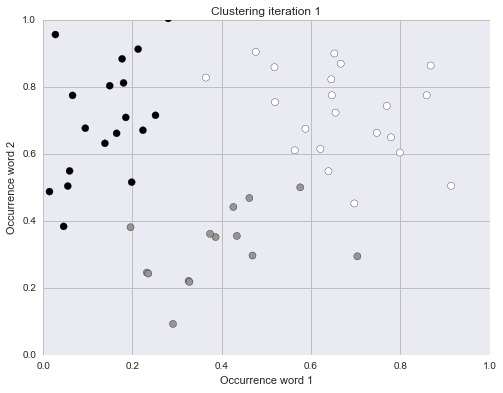

In [87]:
plot_clustering(x, y, "Clustering iteration 1", km=km)

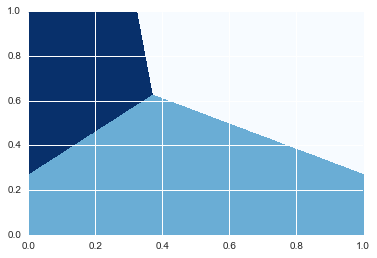

In [88]:
pylab.imshow(Z, interpolation='nearest',
             extent=(mx.min(), mx.max(), my.min(), my.max()),
             cmap=pylab.cm.Blues,
             aspect='auto', origin='lower')


In [89]:
c1a, c1b, c1c = km.cluster_centers_

In [91]:
km.cluster_centers_

array([[ 0.64620597,  0.74739603],
       [ 0.40897156,  0.32805598],
       [ 0.07388637,  0.67524985]])

读取新闻数据集并进行分组

In [6]:
import sklearn.datasets

In [7]:
path = u'C:\机器学习与数据处理\机器学习与系统设计\ch03\data'
data = sklearn.datasets.load_mlcomp('20news-18828',mlcomp_root=path)

In [12]:
print len(data.filenames)

18828


In [13]:
data.target_names

[u'alt.atheism',
 u'comp.graphics',
 u'comp.os.ms-windows.misc',
 u'comp.sys.ibm.pc.hardware',
 u'comp.sys.mac.hardware',
 u'comp.windows.x',
 u'misc.forsale',
 u'rec.autos',
 u'rec.motorcycles',
 u'rec.sport.baseball',
 u'rec.sport.hockey',
 u'sci.crypt',
 u'sci.electronics',
 u'sci.med',
 u'sci.space',
 u'soc.religion.christian',
 u'talk.politics.guns',
 u'talk.politics.mideast',
 u'talk.politics.misc',
 u'talk.religion.misc']

In [15]:
train_data = sklearn.datasets.load_mlcomp('20news-18828','train',mlcomp_root=path)

In [16]:
print len(train_data.filenames)

13180


In [17]:
test_data = sklearn.datasets.load_mlcomp('20news-18828','test',mlcomp_root=path)

In [18]:
print len(test_data.filenames)

5648


In [19]:
import nltk.stem
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
english_stemmer = nltk.stem.SnowballStemmer('english')

In [21]:
class StemmedTfidfVectorizer(TfidfVectorizer):

    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

vectorizer = StemmedTfidfVectorizer(min_df=10, max_df=0.5,
                                    stop_words='english', decode_error='ignore'
                                    )


In [22]:
vectorized = vectorizer.fit_transform(train_data.data)

In [23]:
num_samples, num_features = vectorized.shape

In [24]:
print("#samples: %d, #features: %d" % (num_samples, num_features))

#samples: 13180, #features: 12338


In [25]:
from sklearn.cluster import KMeans

In [27]:
num_clusters = 50 
km = KMeans(n_clusters=num_clusters, n_init=1, verbose=1, random_state=3)
clustered = km.fit(vectorized)

Initialization complete
Iteration  0, inertia 23110.737
Iteration  1, inertia 12457.602
Iteration  2, inertia 12348.871
Iteration  3, inertia 12301.282
Iteration  4, inertia 12277.129
Iteration  5, inertia 12262.895
Iteration  6, inertia 12251.589
Iteration  7, inertia 12243.136
Iteration  8, inertia 12236.952
Iteration  9, inertia 12231.831
Iteration 10, inertia 12227.847
Iteration 11, inertia 12224.328
Iteration 12, inertia 12220.367
Iteration 13, inertia 12216.699
Iteration 14, inertia 12215.231
Iteration 15, inertia 12213.638
Iteration 16, inertia 12212.046
Iteration 17, inertia 12210.770
Iteration 18, inertia 12210.024
Iteration 19, inertia 12209.485
Iteration 20, inertia 12209.067
Iteration 21, inertia 12208.819
Iteration 22, inertia 12208.640
Iteration 23, inertia 12208.529
Iteration 24, inertia 12208.466
Iteration 25, inertia 12208.448
Iteration 26, inertia 12208.444
Converged at iteration 26


In [28]:
print("km.labels_=%s" % km.labels_)

km.labels_=[38 43 26 ...,  6  0 15]


In [29]:
print("km.labels_.shape=%s" % km.labels_.shape)

km.labels_.shape=13180


In [30]:
from sklearn import metrics

In [32]:
labels = train_data.target

In [33]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))

Homogeneity: 0.528


In [34]:
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))

Completeness: 0.460


In [35]:
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))


V-measure: 0.492


In [36]:
print(("Silhouette Coefficient: %0.3f" %
       metrics.silhouette_score(vectorized, labels, sample_size=1000)))


Silhouette Coefficient: 0.007


In [37]:
new_post = \
    """Disk drive problems. Hi, I have a problem with my hard disk.
After 1 year it is working only sporadically now.
I tried to format it, but now it doesn't boot any more.
Any ideas? Thanks.
"""

In [38]:
new_post_vec = vectorizer.transform([new_post])

In [39]:
new_post_vec

<1x12338 sparse matrix of type '<type 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [41]:
new_post_label = km.predict(new_post_vec)[0]

In [45]:
similar_indices = (km.labels_ == new_post_label).nonzero()[0]

In [47]:
import scipy as sp
similar = []
for i in similar_indices:
    dist = sp.linalg.norm((new_post_vec - vectorized[i]).toarray())
    similar.append((dist, train_data.data[i]))

In [51]:
similar = sorted(similar)

In [52]:
print("Count similar: %i" % len(similar))

Count similar: 275


In [54]:
show_at_1 = similar[0]
show_at_2 = similar[int(len(similar) / 10)]
show_at_3 = similar[int(len(similar) / 2)]

In [55]:
print("=== #1 ===")
print(show_at_1)
print()

print("=== #2 ===")
print(show_at_2)
print()

print("=== #3 ===")
print(show_at_3)

=== #1 ===
(1.0006292085400637, "From: rogntorb@idt.unit.no (Torbj|rn Rognes)\nSubject: Adding int. hard disk drive to IIcx\n\nI haven't seen much info about how to add an extra internal disk to a\nmac. We would like to try it, and I wonder if someone had some good\nadvice.\n\nWe have a Mac IIcx with the original internal Quantum 40MB hard disk,\nand an unusable floppy drive. We also have a new spare Connor 40MB\ndisk which we would like to use. The idea is to replace the broken\nfloppy drive with the new hard disk, but there seems to be some\nproblems:\n\nThe internal SCSI cable and power cable inside the cx has only\nconnectors for one single hard disk drive.\n\nIf I made a ribbon cable and a power cable with three connectors each\n(1 for motherboard, 1 for each of the 2 disks), would it work?\n\nIs the IIcx able to supply the extra power to the extra disk?\n\nWhat about terminators? I suppose that i should remove the resistor\npacks from the disk that is closest to the motherboard, 

In [56]:
similar[10]

(1.1158920570921735,
 'From: "Altan J. Stalker" <astalker@nickel.ucs.indiana.edu>\nSubject: SE/30 Hard Drive Problem\n\n\nI have an SE/30 with a 80 meg HD which dates back to April 1989.  When I\noriginally purchased it, I experienced the failure to boot problem.  This\nwas fixed soon after by a ROM upgrade on the hard drive.\n\nLately a similar problem has been occuring.  When the computer is\npowered on the HD light flashes a few times and then I am given\nthe "no disk to boot from" icon.  However, upon turing the\ncomputer off and on again the drive ALWAYS boots up just fine.  \nFurthermore, if instead of turning the power on and off I press the reboot \nbutton the same problem occurs.  But, as I said, turning the power\noff and on always works.\n\nThis problem is different from the 1989 boot problem in that before\nit often required several power off and ons to get it to boot.\n\nDoes anybody have any suggestions as to what the problem is or how\nit can be fixed?\n\nI\'m wondering 